In [1]:
import pandas as pd
import anndata as an
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

# A simple example 

In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame from the data and feature names
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create the AnnData object
adata = an.AnnData(X=data.values)  # Pass the NumPy array (data values) to X

# Add observations (obs) metadata: target names (labels)
adata.obs['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Add variable (var) metadata: feature names
adata.var_names = iris.feature_names  # Assign feature names directly to var_names

print(adata)
adata.to_df()

AnnData object with n_obs × n_vars = 150 × 4
    obs: 'species'


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
[print(x) for x in adata.var_names]

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


[None, None, None, None]

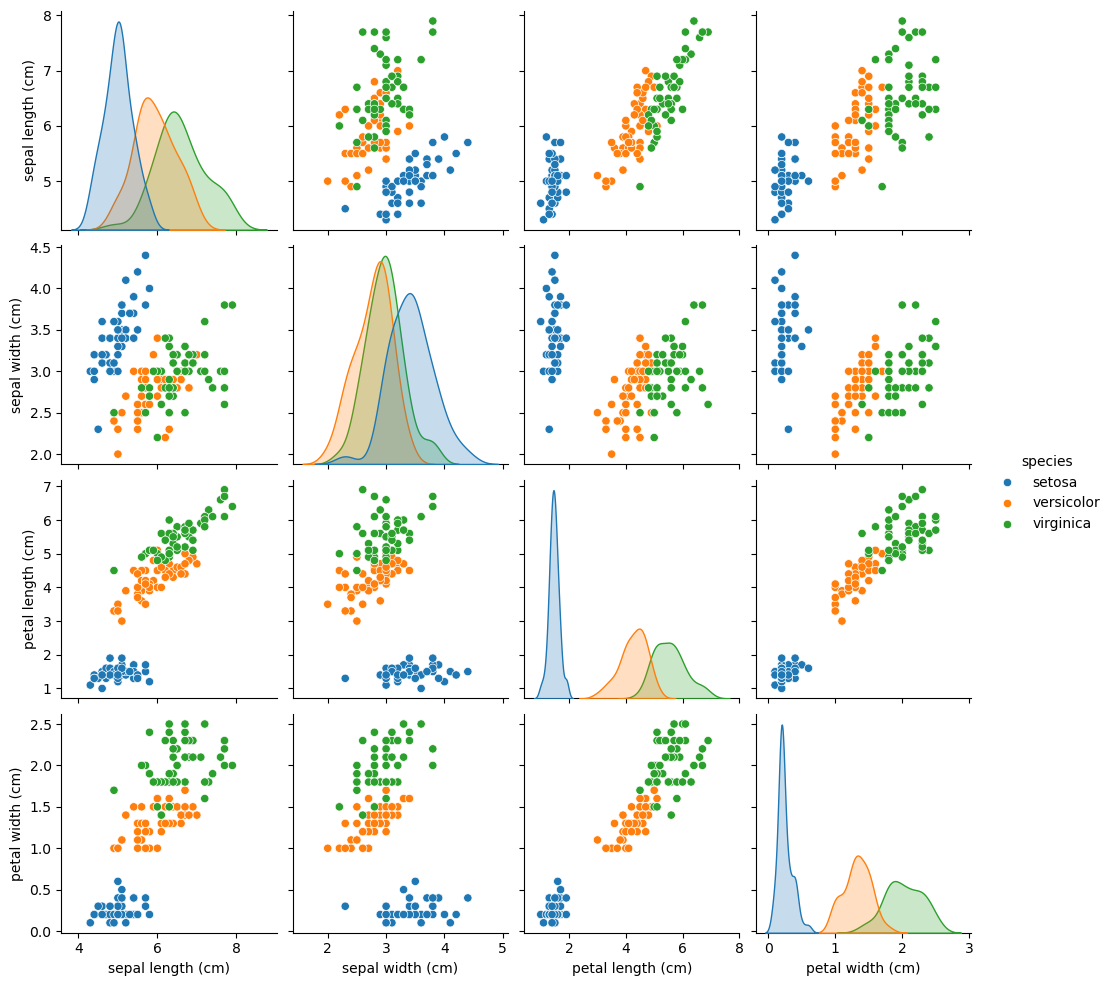

In [4]:
data = adata.to_df()
data['species'] = adata.obs['species']
sns.pairplot(data, hue='species')

# Dimension reduction

In [12]:
# PCA
sc.pp.pca(adata, n_comps=2)

# t-SNE 
sc.tl.tsne(adata, use_rep=None) 

# UMAP 
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

for key in adata.obsm.keys():
    print(f"{key} {adata.obsm[key].shape}")

X_pca (150, 2)
X_tsne (150, 2)
X_umap (150, 2)


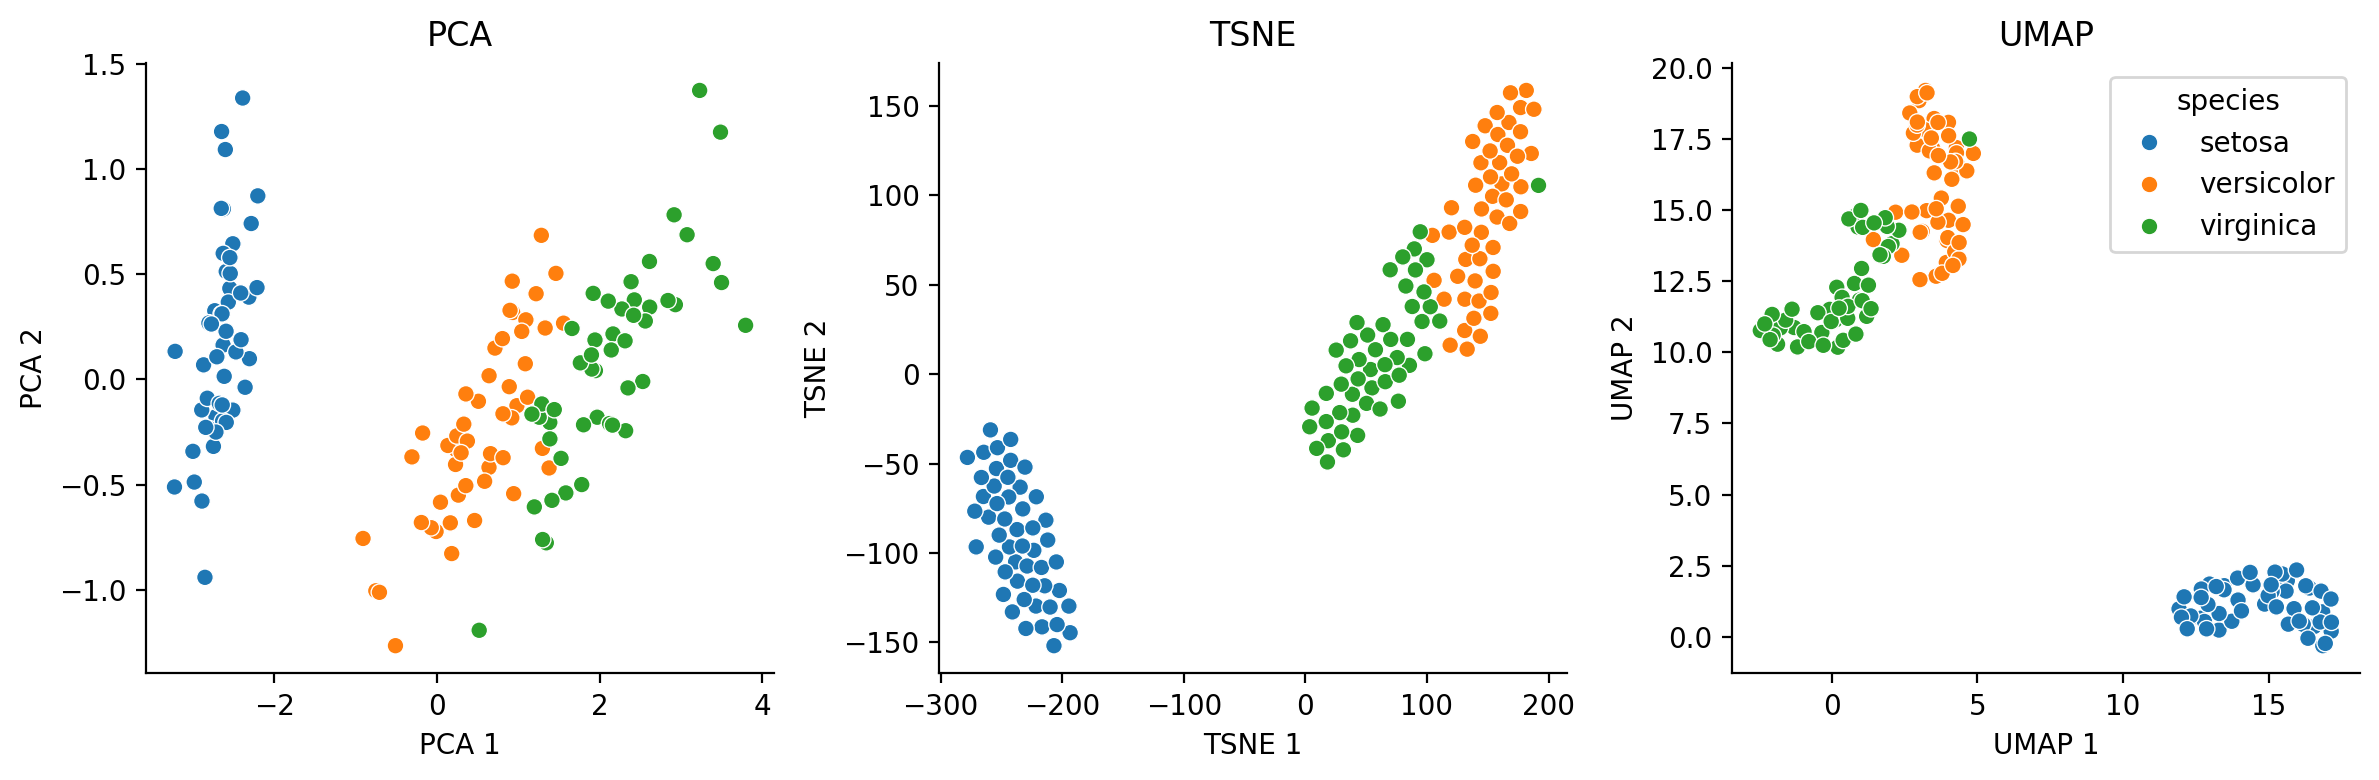

In [40]:

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 12, 4
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()

for i, key in enumerate(adata.obsm.keys()):
    title = key.replace("X_", "").upper()
    emb = pd.DataFrame(
        adata.obsm[key], 
        columns=[f'{title} 1', f'{title} 2'],
    )

    emb['species'] = adata.obs['species'].values
    
    sns.scatterplot(
        data=emb,
        x=f'{title} 1',
        y=f'{title} 2',
        ax=axs[i],
        hue='species',
        # ec='k',
    )
    sns.despine()
    axs[i].set_title(title)
    if not i == 2:
        axs[i].legend().remove()

plt.tight_layout()